<a href="https://colab.research.google.com/github/Emmaculate2020/WK8-DATA-SCIENCE-CORE-IP-DECISION-TREES-AND-SVM/blob/master/WK8__IP_DATA_SCIENCE_CORE_DECISION_TREES_AND_SUPPORT_VECTOR_MACHINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees and Support Vector Machine

## 1. Defining the Question

### a) Specifying the Question


> Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.



### b) Defining the Metric for Success
> The model we are going to create shouls be able to predict whether a person has hypothyroid or not. The accuracy should be higher than 90% because it is a matter of health and therefore higher accuracy is better for the treatment and management of the condition.

### c) Understanding the context 
> We want to perdict whether a person has hypothyroid or not using the features provided in the dataset.

### d) Recording the Experimental Design
> 1. Reading Data
> 2. Checking the Data
> 3. Tidying the Data
> 4. Exploratory Analysis
> 5. Implementing the solution
> 6. Challenging the solution
> 7. Follow up questions

### e) Data Relevance
> Dataset column descriptions

> I got the below descriptions from [https://rdrr.io/cran/MoTBFs/man/thyroid.html]

Age
Age of the patient (0.01–0.97). 

Sex
Sex of the patient, 0 (Male) 1 (Female). Binary variable.

On_thyroxine
0 (FALSE) 1 (TRUE). Binary variable.

Query_on_thyroxine
0 (FALSE) 1 (TRUE). Binary variable.

On_antithyroid_medication
0 (FALSE) 1 (TRUE). Binary variable.

Sick
0 (FALSE) 1 (TRUE). Binary variable.

Pregnant
0 (FALSE) 1 (TRUE). Binary variable.

Thyroid_surgery
0 (FALSE) 1 (TRUE). Binary variable.

I131_treatment
0 (FALSE) 1 (TRUE). Binary variable.

Query_hypothyroid
0 (FALSE) 1 (TRUE). Binary variable.

Query_hyperthyroid
0 (FALSE) 1 (TRUE). Binary variable.

Lithium
0 (FALSE) 1 (TRUE). Binary variable.

Goitre
0 (FALSE) 1 (TRUE). Binary variable.

Tumor
0 (FALSE) 1 (TRUE). Binary variable.

Hypopituitary
0 (FALSE) 1 (TRUE). Binary variable.

Psych
0 (FALSE) 1 (TRUE). Binary variable.

TSH
amount of TSH (0.0–0.53). Continuous variable.

T3
amount of T3 (0.0005–0.18). Continuous variable.

TT4
amount of TT4 (0.002–0.6). Continuous variable.

T4U
amount of T4U (0.017–0.233). Continuous variable.

FTI
amount of FTI (0.002–0.642). Continuous variable.

## 2. Reading the Data

In [43]:
# Importing relevant libraries
#

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Loading the Dataset
#  
#

hypothyroid = pd.read_csv("hypothyroid.csv")
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [5]:
hypothyroid['sex'].value_counts()

F    2182
M     908
?      73
Name: sex, dtype: int64

In [6]:
hypothyroid['status'].unique()

array(['hypothyroid', 'negative'], dtype=object)

## 3. Checking the Data

In [7]:
# Determining the no. of records in our dataset
#

hypothyroid.shape

(3163, 26)

In [8]:
# Previewing the top of our dataset
#
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [9]:
# Previewing the bottom of our dataset
# 
hypothyroid.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [10]:
# Checking whether each column has an appropriate datatype
#

hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [11]:
hypothyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [12]:
# Making sure that our dataframe has the appropriate datatype
# First we use labelencoder to convert the categorical variables into numerical variables
#

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
hypothyroid['FTI_measured'] = lb_make.fit_transform(hypothyroid['FTI_measured']) 
hypothyroid['sex'] = lb_make.fit_transform(hypothyroid['sex'])
hypothyroid['on_thyroxine'] = lb_make.fit_transform(hypothyroid['on_thyroxine'])
hypothyroid['query_on_thyroxine'] = lb_make.fit_transform(hypothyroid['query_on_thyroxine'])
hypothyroid['on_antithyroid_medication'] = lb_make.fit_transform(hypothyroid['on_antithyroid_medication'])
hypothyroid['query_hypothyroid'] = lb_make.fit_transform(hypothyroid['query_hypothyroid'])
hypothyroid['query_hyperthyroid'] = lb_make.fit_transform(hypothyroid['query_hyperthyroid'])
hypothyroid['pregnant'] = lb_make.fit_transform(hypothyroid['pregnant'])
hypothyroid['sick'] = lb_make.fit_transform(hypothyroid['sick'])
hypothyroid['tumor'] = lb_make.fit_transform(hypothyroid['tumor'])
hypothyroid['lithium'] = lb_make.fit_transform(hypothyroid['lithium'])
hypothyroid['goitre'] = lb_make.fit_transform(hypothyroid['goitre'])
hypothyroid['TSH_measured'] = lb_make.fit_transform(hypothyroid['TSH_measured'])
hypothyroid['T3_measured'] = lb_make.fit_transform(hypothyroid['T3_measured'])
hypothyroid['TT4_measured'] = lb_make.fit_transform(hypothyroid['TT4_measured'])
hypothyroid['T4U_measured'] = lb_make.fit_transform(hypothyroid['T4U_measured'])
hypothyroid['FTI_measured'] = lb_make.fit_transform(hypothyroid['FTI_measured'])
hypothyroid['TBG_measured'] = lb_make.fit_transform(hypothyroid['TBG_measured'])
hypothyroid['thyroid_surgery'] = lb_make.fit_transform(hypothyroid['thyroid_surgery'])
hypothyroid.head()



,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,2,0,0,0,0,0,0,0,0,0,0,0,1,30,1,0.60,1,15,1,1.48,1,10,0,?
1,hypothyroid,15,1,1,0,0,0,0,0,0,0,0,0,0,1,145,1,1.70,1,19,1,1.13,1,17,0,?
2,hypothyroid,24,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.20,1,4,1,1,1,0,0,?
3,hypothyroid,24,1,0,0,0,0,0,0,0,0,0,0,0,1,430,1,0.40,1,6,1,1.04,1,6,0,?
4,hypothyroid,77,2,0,0,0,0,0,0,0,0,0,0,0,1,7.30,1,1.20,1,57,1,1.28,1,44,0,?


In [13]:
hypothyroid['status'].unique()

array(['hypothyroid', 'negative'], dtype=object)

In [14]:
hypothyroid.dtypes

status                       object
age                          object
sex                           int64
on_thyroxine                  int64
query_on_thyroxine            int64
on_antithyroid_medication     int64
thyroid_surgery               int64
query_hypothyroid             int64
query_hyperthyroid            int64
pregnant                      int64
sick                          int64
tumor                         int64
lithium                       int64
goitre                        int64
TSH_measured                  int64
TSH                          object
T3_measured                   int64
T3                           object
TT4_measured                  int64
TT4                          object
T4U_measured                  int64
T4U                          object
FTI_measured                  int64
FTI                          object
TBG_measured                  int64
TBG                          object
dtype: object

In [15]:
# Selecting the columns with object values
#

obj_df = hypothyroid.select_dtypes(include=['object']).copy()
obj_df.head()

,status,age,TSH,T3,TT4,T4U,FTI,TBG
0,hypothyroid,72,30,0.60,15,1.48,10,?
1,hypothyroid,15,145,1.70,19,1.13,17,?
2,hypothyroid,24,0,0.20,4,1,0,?
3,hypothyroid,24,430,0.40,6,1.04,6,?
4,hypothyroid,77,7.30,1.20,57,1.28,44,?


In [16]:
hypothyroid["TBG"].replace({"?": 0}, inplace=True)
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,2,0,0,0,0,0,0,0,0,0,0,0,1,30,1,0.60,1,15,1,1.48,1,10,0,0
1,hypothyroid,15,1,1,0,0,0,0,0,0,0,0,0,0,1,145,1,1.70,1,19,1,1.13,1,17,0,0
2,hypothyroid,24,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.20,1,4,1,1,1,0,0,0
3,hypothyroid,24,1,0,0,0,0,0,0,0,0,0,0,0,1,430,1,0.40,1,6,1,1.04,1,6,0,0
4,hypothyroid,77,2,0,0,0,0,0,0,0,0,0,0,0,1,7.30,1,1.20,1,57,1,1.28,1,44,0,0


In [17]:
hypothyroid["age"].replace({"?": 0}, inplace=True)
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,2,0,0,0,0,0,0,0,0,0,0,0,1,30,1,0.60,1,15,1,1.48,1,10,0,0
1,hypothyroid,15,1,1,0,0,0,0,0,0,0,0,0,0,1,145,1,1.70,1,19,1,1.13,1,17,0,0
2,hypothyroid,24,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.20,1,4,1,1,1,0,0,0
3,hypothyroid,24,1,0,0,0,0,0,0,0,0,0,0,0,1,430,1,0.40,1,6,1,1.04,1,6,0,0
4,hypothyroid,77,2,0,0,0,0,0,0,0,0,0,0,0,1,7.30,1,1.20,1,57,1,1.28,1,44,0,0


In [18]:
hypothyroid["TSH"].replace({"?": 0}, inplace=True)
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,2,0,0,0,0,0,0,0,0,0,0,0,1,30,1,0.60,1,15,1,1.48,1,10,0,0
1,hypothyroid,15,1,1,0,0,0,0,0,0,0,0,0,0,1,145,1,1.70,1,19,1,1.13,1,17,0,0
2,hypothyroid,24,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.20,1,4,1,1,1,0,0,0
3,hypothyroid,24,1,0,0,0,0,0,0,0,0,0,0,0,1,430,1,0.40,1,6,1,1.04,1,6,0,0
4,hypothyroid,77,2,0,0,0,0,0,0,0,0,0,0,0,1,7.30,1,1.20,1,57,1,1.28,1,44,0,0


In [19]:
hypothyroid["T3"].replace({"?": 0}, inplace=True)
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,2,0,0,0,0,0,0,0,0,0,0,0,1,30,1,0.60,1,15,1,1.48,1,10,0,0
1,hypothyroid,15,1,1,0,0,0,0,0,0,0,0,0,0,1,145,1,1.70,1,19,1,1.13,1,17,0,0
2,hypothyroid,24,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.20,1,4,1,1,1,0,0,0
3,hypothyroid,24,1,0,0,0,0,0,0,0,0,0,0,0,1,430,1,0.40,1,6,1,1.04,1,6,0,0
4,hypothyroid,77,2,0,0,0,0,0,0,0,0,0,0,0,1,7.30,1,1.20,1,57,1,1.28,1,44,0,0


In [20]:
hypothyroid["TT4"].replace({"?": 0}, inplace=True)
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,2,0,0,0,0,0,0,0,0,0,0,0,1,30,1,0.60,1,15,1,1.48,1,10,0,0
1,hypothyroid,15,1,1,0,0,0,0,0,0,0,0,0,0,1,145,1,1.70,1,19,1,1.13,1,17,0,0
2,hypothyroid,24,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.20,1,4,1,1,1,0,0,0
3,hypothyroid,24,1,0,0,0,0,0,0,0,0,0,0,0,1,430,1,0.40,1,6,1,1.04,1,6,0,0
4,hypothyroid,77,2,0,0,0,0,0,0,0,0,0,0,0,1,7.30,1,1.20,1,57,1,1.28,1,44,0,0


In [21]:
hypothyroid["T4U"].replace({"?": 0}, inplace=True)
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,2,0,0,0,0,0,0,0,0,0,0,0,1,30,1,0.60,1,15,1,1.48,1,10,0,0
1,hypothyroid,15,1,1,0,0,0,0,0,0,0,0,0,0,1,145,1,1.70,1,19,1,1.13,1,17,0,0
2,hypothyroid,24,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.20,1,4,1,1,1,0,0,0
3,hypothyroid,24,1,0,0,0,0,0,0,0,0,0,0,0,1,430,1,0.40,1,6,1,1.04,1,6,0,0
4,hypothyroid,77,2,0,0,0,0,0,0,0,0,0,0,0,1,7.30,1,1.20,1,57,1,1.28,1,44,0,0


In [22]:
hypothyroid["FTI"].replace({"?": 0}, inplace=True)
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,2,0,0,0,0,0,0,0,0,0,0,0,1,30,1,0.60,1,15,1,1.48,1,10,0,0
1,hypothyroid,15,1,1,0,0,0,0,0,0,0,0,0,0,1,145,1,1.70,1,19,1,1.13,1,17,0,0
2,hypothyroid,24,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.20,1,4,1,1,1,0,0,0
3,hypothyroid,24,1,0,0,0,0,0,0,0,0,0,0,0,1,430,1,0.40,1,6,1,1.04,1,6,0,0
4,hypothyroid,77,2,0,0,0,0,0,0,0,0,0,0,0,1,7.30,1,1.20,1,57,1,1.28,1,44,0,0


In [23]:
hypothyroid['TBG'].replace("None", 0, inplace=True)
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,2,0,0,0,0,0,0,0,0,0,0,0,1,30,1,0.60,1,15,1,1.48,1,10,0,0
1,hypothyroid,15,1,1,0,0,0,0,0,0,0,0,0,0,1,145,1,1.70,1,19,1,1.13,1,17,0,0
2,hypothyroid,24,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.20,1,4,1,1,1,0,0,0
3,hypothyroid,24,1,0,0,0,0,0,0,0,0,0,0,0,1,430,1,0.40,1,6,1,1.04,1,6,0,0
4,hypothyroid,77,2,0,0,0,0,0,0,0,0,0,0,0,1,7.30,1,1.20,1,57,1,1.28,1,44,0,0


In [0]:
hypothyroid['age'] = hypothyroid['age'].astype(int)

In [0]:
hypothyroid['TSH'] = hypothyroid['TSH'].astype(float)

In [0]:
hypothyroid['TSH'] = hypothyroid['TSH'].astype(int)

In [0]:
hypothyroid['T3'] = hypothyroid['T3'].astype(float)

In [0]:
hypothyroid['T3'] = hypothyroid['T3'].astype(int)

In [0]:
hypothyroid['TT4'] = hypothyroid['TT4'].astype(float)

In [0]:
hypothyroid['TT4'] = hypothyroid['TT4'].astype(int)

In [0]:
hypothyroid['T4U'] = hypothyroid['T4U'].astype(float)

In [0]:
hypothyroid['T4U'] = hypothyroid['T4U'].astype(int)

In [0]:
hypothyroid['FTI'] = hypothyroid['FTI'].astype(float)

In [0]:
hypothyroid['FTI'] = hypothyroid['FTI'].astype(int)

In [0]:
hypothyroid['TBG'] = hypothyroid['TBG'].astype(float)

In [0]:
hypothyroid['TBG'] = hypothyroid['TBG'].astype(int)

In [37]:
hypothyroid['TBG'].apply(np.floor)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3158    0.0
3159    0.0
3160    0.0
3161    0.0
3162    0.0
Name: TBG, Length: 3163, dtype: float64

In [38]:
hypothyroid.dtypes


status                       object
age                           int64
sex                           int64
on_thyroxine                  int64
query_on_thyroxine            int64
on_antithyroid_medication     int64
thyroid_surgery               int64
query_hypothyroid             int64
query_hyperthyroid            int64
pregnant                      int64
sick                          int64
tumor                         int64
lithium                       int64
goitre                        int64
TSH_measured                  int64
TSH                           int64
T3_measured                   int64
T3                            int64
TT4_measured                  int64
TT4                           int64
T4U_measured                  int64
T4U                           int64
FTI_measured                  int64
FTI                           int64
TBG_measured                  int64
TBG                           int64
dtype: object

> We have managed to convert the column values to the same datatype i.e integers.

## 4. External Data Source Validation

### a.Validation

## 5. Tidying the Dataset

In [40]:
hypothyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

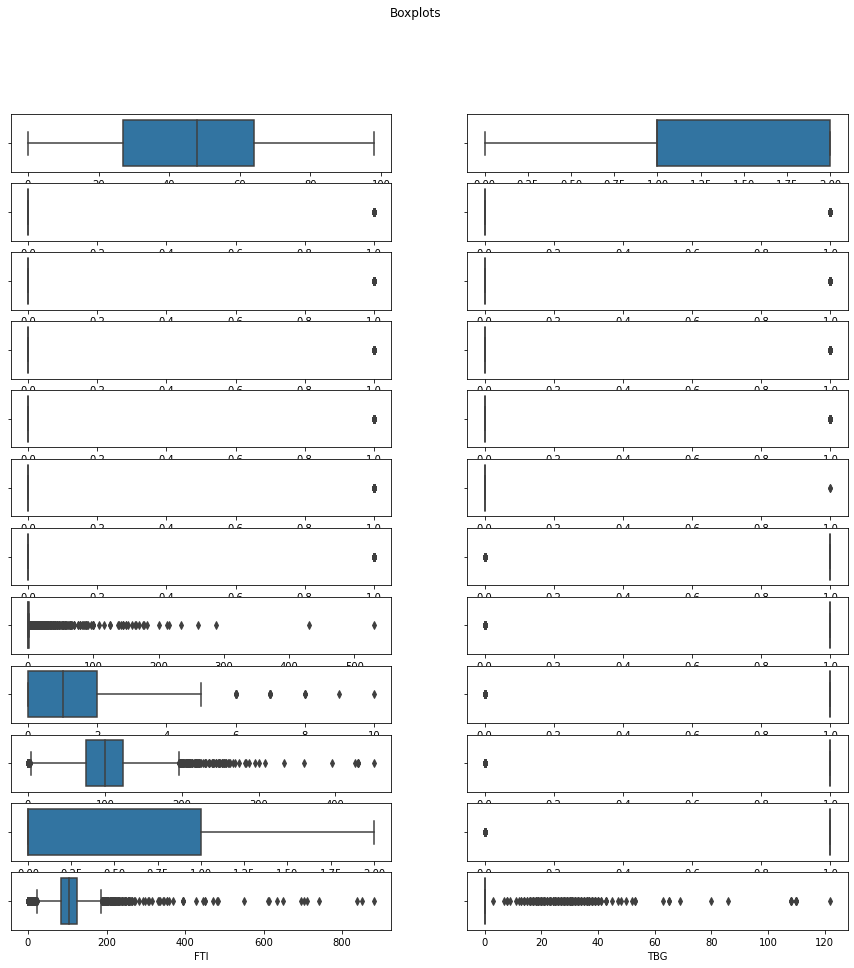

In [45]:
# Checking for Outliers
#
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14), (ax15, ax16), (ax17, ax18), (ax19, ax20),(ax21,ax22),(ax23,ax24)) = plt.subplots(12,2, figsize=(15, 15))
fig.suptitle('Boxplots')

sns.boxplot(hypothyroid['age'], ax=ax1)
sns.boxplot(hypothyroid['sex'], ax=ax2)
sns.boxplot(hypothyroid['query_on_thyroxine'], ax=ax3)
sns.boxplot(hypothyroid['on_thyroxine'], ax=ax4)
sns.boxplot(hypothyroid['on_antithyroid_medication'], ax=ax5)
sns.boxplot(hypothyroid['thyroid_surgery'], ax=ax6)
sns.boxplot(hypothyroid['query_hypothyroid'], ax=ax7)
sns.boxplot(hypothyroid['query_hyperthyroid'], ax=ax8)
sns.boxplot(hypothyroid['pregnant'], ax=ax9)
sns.boxplot(hypothyroid['sick'], ax=ax10)
sns.boxplot(hypothyroid['tumor'], ax=ax11)
sns.boxplot(hypothyroid['lithium'], ax=ax12)
sns.boxplot(hypothyroid['goitre'], ax=ax13)
sns.boxplot(hypothyroid['TSH_measured'], ax=ax14)
sns.boxplot(hypothyroid['TSH'], ax=ax15)
sns.boxplot(hypothyroid['T3_measured'], ax=ax16)
sns.boxplot(hypothyroid['T3'], ax=ax17)
sns.boxplot(hypothyroid['TT4_measured'], ax=ax18)
sns.boxplot(hypothyroid['TT4'], ax=ax19)
sns.boxplot(hypothyroid['T4U_measured'], ax=ax20)
sns.boxplot(hypothyroid['T4U'], ax=ax21)
sns.boxplot(hypothyroid['FTI_measured'], ax=ax22)
sns.boxplot(hypothyroid['FTI'], ax=ax23)
sns.boxplot(hypothyroid['TBG'], ax=ax24)
plt.show()


In [202]:
# Checking for Anomalies
#
# Check outliers using IQR Score
# Find the IQR Score first
Q1 = hypothyroid.quantile(0.25)
Q3 = hypothyroid.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                          37.0
sex                           1.0
on_thyroxine                  0.0
query_on_thyroxine            0.0
on_antithyroid_medication     0.0
thyroid_surgery               0.0
query_hypothyroid             0.0
query_hyperthyroid            0.0
pregnant                      0.0
sick                          0.0
tumor                         0.0
lithium                       0.0
goitre                        0.0
TSH_measured                  0.0
TSH                           1.0
T3_measured                   0.0
T3                            2.0
TT4_measured                  0.0
TT4                          48.0
T4U_measured                  0.0
T4U                           1.0
FTI_measured                  0.0
FTI                          41.0
TBG_measured                  0.0
TBG                           0.0
dtype: float64


In [203]:
# Multiply the (IQR) by 1.5
# Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier.
# Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier.

print(hypothyroid < (Q1 - 1.5 * IQR)) |(hypothyroid > (Q3 + 1.5 * IQR))

# True indicates the presence of an outlier

        FTI  FTI_measured     T3  ...  status  thyroid_surgery  tumor
0      True         False  False  ...   False            False  False
1      True         False  False  ...   False            False  False
2      True         False  False  ...   False            False  False
3      True         False  False  ...   False            False  False
4     False         False  False  ...   False            False  False
...     ...           ...    ...  ...     ...              ...    ...
3158  False         False  False  ...   False            False  False
3159  False         False  False  ...   False            False  False
3160  False         False  False  ...   False            False  False
3161  False         False  False  ...   False            False  False
3162  False         False  False  ...   False            False  False

[3163 rows x 26 columns]


TypeError: ignored

In [125]:
# Remove the outliers
hypothyroid = hypothyroid[~((hypothyroid < (Q1 - 1.5 * IQR)) |(hypothyroid > (Q3 + 1.5 * IQR))).any(axis=1)]
hypothyroid.shape

(1222, 26)

In [0]:
# Checking again if we still have outliers just in case before we proceed with other analyses

print(hypothyroid < (Q1 - 1.5 * IQR)) |(hypothyroid > (Q3 + 1.5 * IQR))

# There are no more outliers, the boolean value True has disappeared and we are anly remaining with false values.

In [204]:
hypothyroid['status'].unique()

array(['hypothyroid', 'negative'], dtype=object)

In [205]:
# Identifying the Missing Data
#

hypothyroid.isnull().sum()

# Our data do not have null values, this makes our work easier.

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [206]:
# We check if there are any duplicates and remove them
#

hypothyroid.duplicated().unique()

# So there are duplicates and we are going to deal with them
# In our case dropping duplicates might not be necessary because we may find patients at the same age with similar characteristics
# and so dropping them may have a egative impact on our analysis

array([False,  True])

In [0]:
# We are going to drop duplicates using the following code
#

## 6. Exploratory Analysis

In [46]:
hypothyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

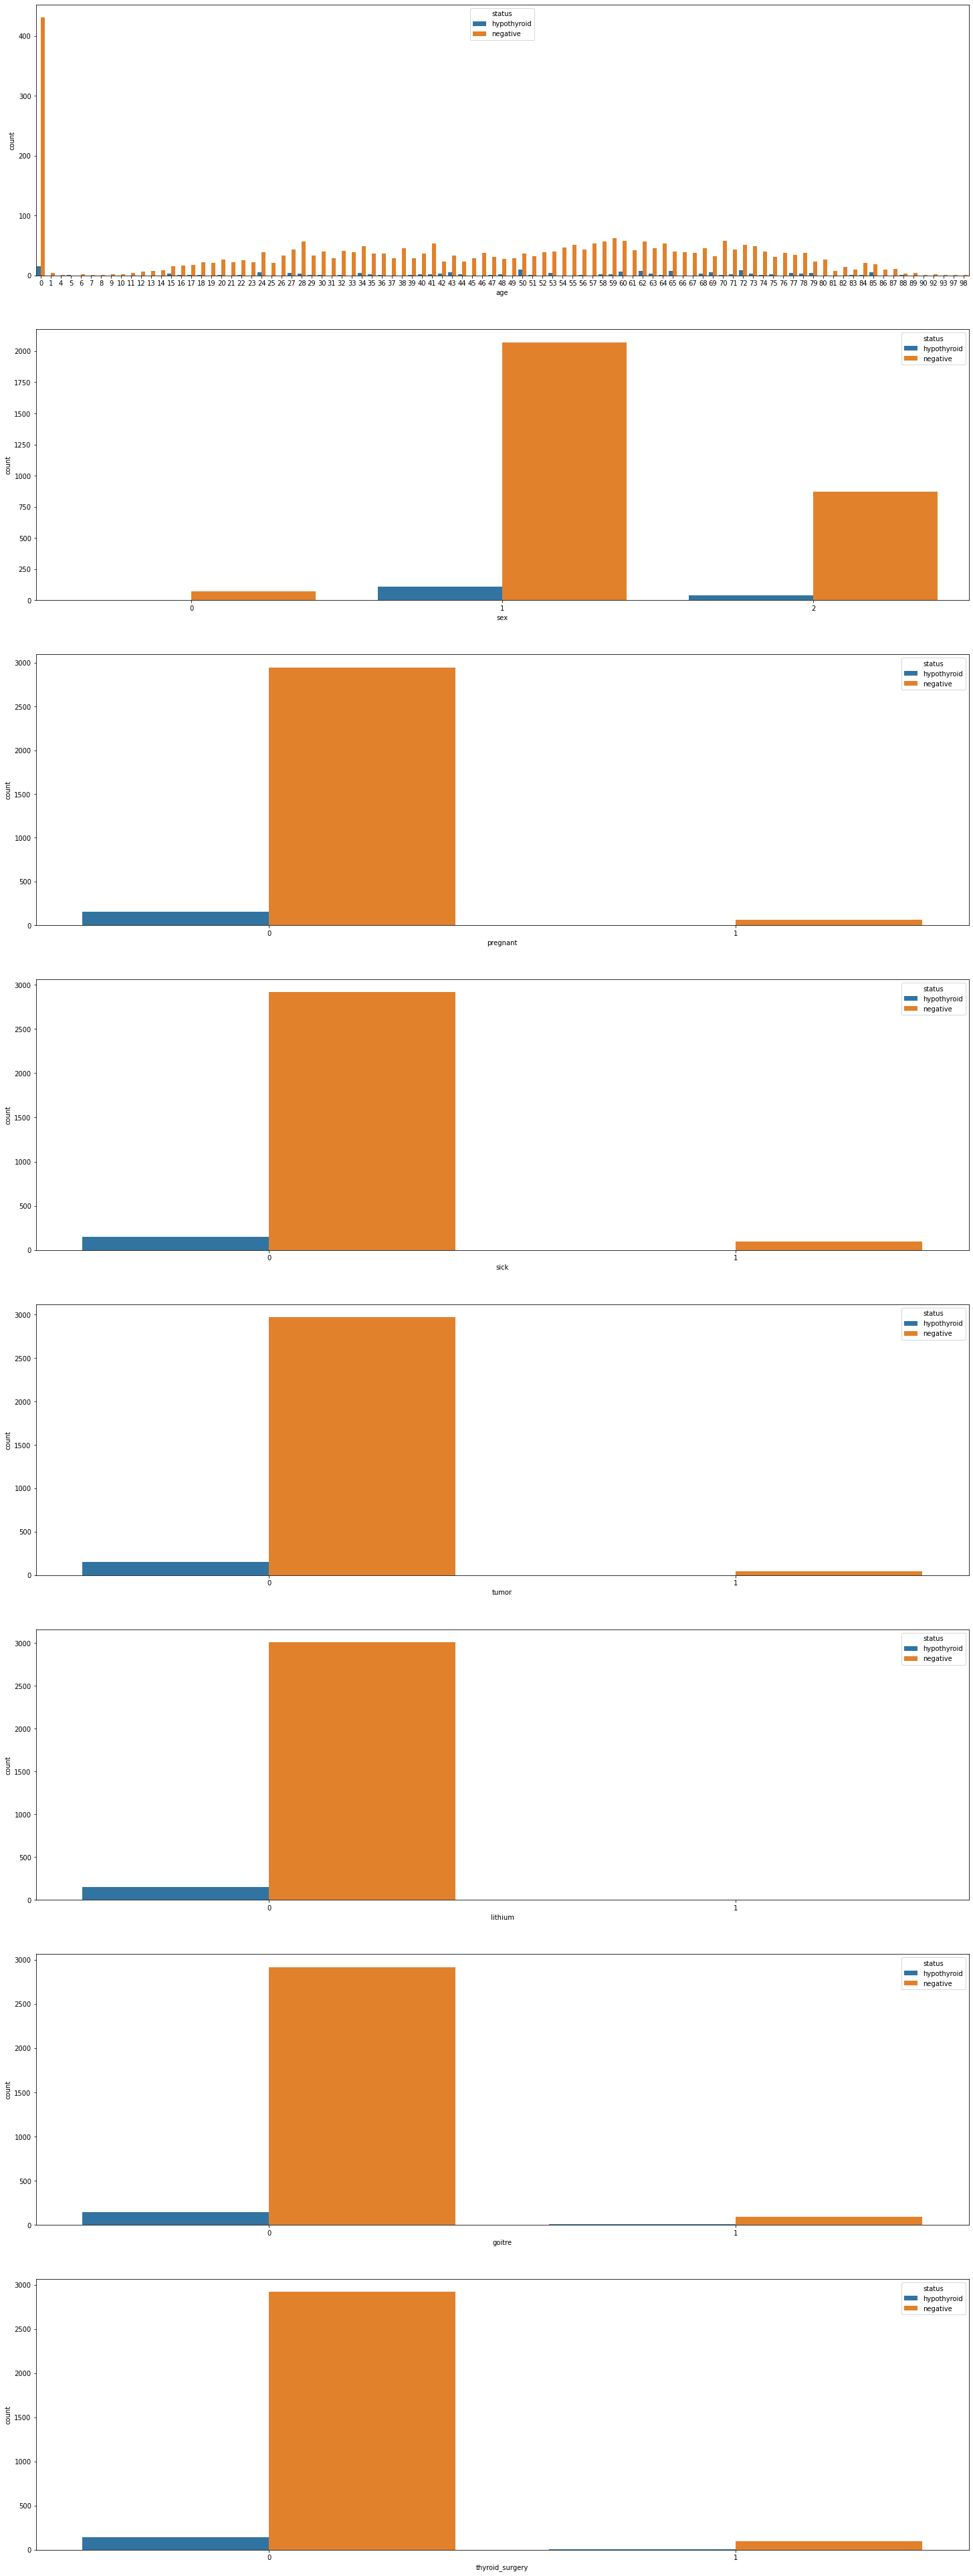

In [48]:
# Ploting the bivariate summaries and recording our observations
#
f, axes = plt.subplots(8, 1, figsize=[25, 70])

sns.countplot('age', hue= 'status', data=hypothyroid, ax=axes[0])
sns.countplot('sex', hue= 'status', data=hypothyroid, ax=axes[1])
sns.countplot('pregnant', hue= 'status', data=hypothyroid, ax=axes[2])
sns.countplot('sick', hue= 'status', data=hypothyroid, ax=axes[3])
sns.countplot('tumor', hue= 'status', data=hypothyroid, ax=axes[4])
sns.countplot('lithium', hue= 'status', data=hypothyroid, ax=axes[5])
sns.countplot('goitre', hue= 'status', data=hypothyroid, ax=axes[6])
sns.countplot('thyroid_surgery', hue= 'status', data=hypothyroid, ax=axes[7])

## Observations
> 1. Majority of the patients who register high number of thyroid cases are children at the age of between 1-12 months and again they register the highest number of negative cases.
> 2. Majority of those who test positive and negative for hypothyroidism are the female gender represented by code 2.
> 3. Majority of those who test positive for hypothyroid do not have tumor.

## 7. Implementing the Solution

## Decision Trees

### Random Forest

In [208]:
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,2,0,0,0,0,0,0,0,0,0,0,0,1,30,1,0,1,15,1,1,1,10,0,0
1,hypothyroid,15,1,1,0,0,0,0,0,0,0,0,0,0,1,145,1,1,1,19,1,1,1,17,0,0
2,hypothyroid,24,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,4,1,1,1,0,0,0
3,hypothyroid,24,1,0,0,0,0,0,0,0,0,0,0,0,1,430,1,0,1,6,1,1,1,6,0,0
4,hypothyroid,77,2,0,0,0,0,0,0,0,0,0,0,0,1,7,1,1,1,57,1,1,1,44,0,0


In [209]:
hypothyroid['sex'].unique()

array([2, 1, 0])

In [210]:
# First we are going to describe our data

hypothyroid.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,43.941195,1.263990,0.145748,0.017389,0.013279,0.032880,0.076193,0.076826,0.019918,0.031299,0.012646,0.000632,0.031299,0.852039,4.833386,0.780272,1.170092,0.921277,100.279165,0.921593,0.374328,0.921910,106.384445,0.082200,2.570977
std,25.235169,0.490443,0.352909,0.130735,0.114483,0.178351,0.265349,0.266357,0.139740,0.174153,0.111760,0.025142,0.174153,0.355117,22.189877,0.414128,1.106946,0.269348,52.592109,0.268853,0.486632,0.268356,65.610326,0.274713,10.204035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,76.000000,1.000000,0.000000,1.000000,85.000000,0.000000,0.000000
50%,48.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,100.000000,1.000000,0.000000,1.000000,105.000000,0.000000,0.000000
75%,64.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,124.000000,1.000000,1.000000,1.000000,126.000000,0.000000,0.000000
max,98.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,1.000000,10.000000,1.000000,450.000000,1.000000,2.000000,1.000000,881.000000,1.000000,122.000000


In [0]:
# Implementing the Solution
# 
# We define our test featres and target variable 

X = hypothyroid.drop('status', axis = 1).values

# We want to predict if someone has hypothyroidism so we will use status column as our label
# y = hypothyroid['status']
y = np.where(hypothyroid['status'] == "hypothyroid", 1,0)

In [0]:
# Splitting ou data into training and test sets

X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.2, random_state = 42)

In [213]:
# Importing our model
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor(n_estimators = 500, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame


,Actual,Predicted
0,0,0.000014
1,0,0.000014
2,0,0.000014
3,0,0.208370
4,0,0.013840
...,...,...
628,0,0.000014
629,0,0.000014
630,0,0.002710
631,0,0.000014


In [214]:
# Summary statistics of our comparison dataframe
#
comparison_frame.describe()

,Actual,Predicted
count,633.000000,633.000000
mean,0.058452,0.053960
std,0.234781,0.207453
min,0.000000,0.000014
25%,0.000000,0.000014
50%,0.000000,0.000014
75%,0.000000,0.000617
max,1.000000,0.986832


In [215]:
# We then evaluate the performance of our model as follows

from sklearn import metrics

# we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Wow! There are no errors, we will then assess the accuracy of our model

Mean Absolute Error: 0.015486128387208137
Mean Squared Error: 0.007407063186169737
Root Mean Squared Error: 0.08606429681447317


In [216]:
# We then get the score of our model

forest.score(X_train, y_train)

# We get that our model is 90% accurate which is not so good given that this is a health issue and therefore predictions should be 100% for maximum certainty.

0.9004627960590981

### AdaBoost

In [0]:
#Defining out test and target features
#

X = hypothyroid.drop('status', axis = 1).values
y = np.where(hypothyroid['status'] == "hypothyroid", 1,0)

In [0]:
# Splitting our data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [219]:
# We begin by importing necessary libraries

from sklearn.ensemble import AdaBoostRegressor

# We use 200 trees again as we did in random forest with adepth of 5
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 5), n_estimators = 100, random_state = 0)

# Training our data by fitting our model
ada_boost = ada_boost.fit(X_train,y_train)

# Making predictions using the test data and printing the predicted values
y_predict_ada = ada_boost.predict(X_test)

print(y_predict_ada)

[0.         0.         0.         0.3153527  0.15068493 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.37511033
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.05263158 0.
 0.7603912  0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00543478 0.
 0.         0.         0.         0.         0.         0.
 0.         0.56526807 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

In [220]:
# Creating a comparison dataframe with the actual and the predicted values

comparison_df = pd.DataFrame({"Actual" : y_test, "Predicted" : y_predict_ada})

comparison_df.head(10)

,Actual,Predicted
0,0,0.000000
1,0,0.000000
2,0,0.000000
3,0,0.315353
4,0,0.150685
5,0,0.000000
6,0,0.000000
7,0,0.000000
8,0,0.000000
9,0,0.000000


In [221]:
# We then get the summary statistics of the comparison dataframe

comparison_df.describe()

,Actual,Predicted
count,633.000000,633.000000
mean,0.058452,0.049819
std,0.234781,0.198583
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [222]:
# We then evaluate the performance of our model by first assessing the errors

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict_ada))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict_ada))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict_ada)))

Mean Absolute Error: 0.018645776363404615
Mean Squared Error: 0.01068189568695961
Root Mean Squared Error: 0.10335325677964681


In [223]:
# Assessing the accuracy of our model

ada_boost.score(X_train, y_train)

# This model is 98% accurate which is more accurate compared to Random forest regressor.

0.9848254096066132

### Gradient Boosting

In [0]:
#Defining out test and target features
#

X = hypothyroid.drop('status', axis = 1).values
y = np.where(hypothyroid['status'] == "hypothyroid", 1,0)

In [0]:
# Splitting our data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [226]:
# Again we import the necesary library
from sklearn.ensemble import GradientBoostingRegressor

# We use 200 trees again as we did in Adaboost with adepth of 5 and learing rate of 0.1
grad_boost = GradientBoostingRegressor(n_estimators = 200, max_depth = 5, learning_rate = 0.1 )

# We fit our train data in the model
grad_boost = grad_boost.fit(X_train,y_train)

# We then make our predictions using the test data
y_predict_grad = grad_boost.predict(X_test)

print(y_predict_grad)

[-1.52752642e-04 -1.04213249e-04  4.25390897e-05  2.16505701e-02
  3.02563444e-03 -1.92037484e-03 -1.21683686e-04 -1.85672341e-02
 -3.83437552e-05 -1.52752642e-04 -1.27195960e-04  1.12355114e-04
  5.74891729e-04 -2.59491535e-05  1.52735520e-05 -2.04023039e-05
 -1.43696493e-04  1.27347430e-01  7.24985957e-05 -6.90163351e-05
  4.25390897e-05  1.95068965e-04 -2.86644126e-05 -2.18794447e-04
 -2.82292658e-03 -2.86644126e-05  1.58091338e-04 -6.39073591e-05
 -2.15639404e-02 -5.87704135e-04  7.75905887e-01  1.45600792e-03
 -4.64369215e-05  1.79888112e-05 -5.58141927e-05  1.58091338e-04
 -4.13351075e-02 -2.86644126e-05 -1.35347052e-04  1.63721806e-04
 -4.61348501e-05  1.00030967e+00 -8.06442937e-04  8.33526561e-05
 -2.50618932e-04  7.48601029e-06 -1.55169199e-04  4.25390897e-05
 -2.04023039e-05 -4.05880006e-05  4.25390897e-05 -2.76144916e-05
 -2.86644126e-05 -2.57528828e-06 -7.72038060e-05 -3.78727415e-05
 -1.43480113e-03  6.99298695e-05  7.36112551e-04  4.25390897e-05
  3.80245331e-05  9.97885

In [227]:
# Creating a comparison dataframe with the actual and the predicted values

comparison_df = pd.DataFrame({"Actual" : y_test, "Predicted" : y_predict_grad})

comparison_df.head(10)

,Actual,Predicted
0,0,-0.000153
1,0,-0.000104
2,0,0.000043
3,0,0.021651
4,0,0.003026
5,0,-0.001920
6,0,-0.000122
7,0,-0.018567
8,0,-0.000038
9,0,-0.000153


In [228]:
# We then get the summary statistics of the comparison dataframe

comparison_df.describe()

,Actual,Predicted
count,633.000000,633.000000
mean,0.058452,0.052395
std,0.234781,0.216068
min,0.000000,-0.147441
25%,0.000000,-0.000077
50%,0.000000,-0.000029
75%,0.000000,0.000095
max,1.000000,1.017646


In [229]:
# We then evaluate the performance of our model by first assessing the errors

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict_grad))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict_grad))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict_grad)))

Mean Absolute Error: 0.015400080985154486
Mean Squared Error: 0.010765933734842085
Root Mean Squared Error: 0.10375901760734864


In [230]:
# Assessing the accuracy of our model

grad_boost.score(X_train, y_train)

# Wow! This is giving us 99.99% which is 100% accurate. This model therefore performs better than both Random Forest and AdaBoost.
# I would recommend the use of this model to determine whether a person has hypothyroidismor not.

0.9999462830481898

## Obseravation
> The GradientBoost performed better giving an accuracy of approximately 100% compared to Rando Forest and AdaBoost. In this case it is the best model to be used in precidting if a patient has hypothyroid.

## Support Vector Machine

In [231]:
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,2,0,0,0,0,0,0,0,0,0,0,0,1,30,1,0,1,15,1,1,1,10,0,0
1,hypothyroid,15,1,1,0,0,0,0,0,0,0,0,0,0,1,145,1,1,1,19,1,1,1,17,0,0
2,hypothyroid,24,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,4,1,1,1,0,0,0
3,hypothyroid,24,1,0,0,0,0,0,0,0,0,0,0,0,1,430,1,0,1,6,1,1,1,6,0,0
4,hypothyroid,77,2,0,0,0,0,0,0,0,0,0,0,0,1,7,1,1,1,57,1,1,1,44,0,0


In [0]:
# Importing necessary libraries
#
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import confusion_matrix

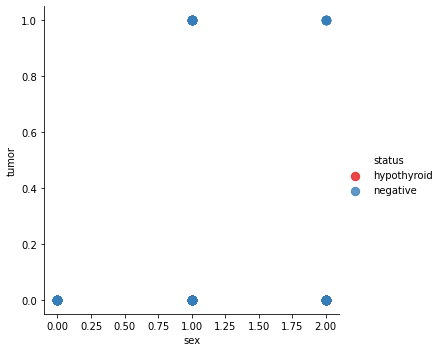

In [49]:
# We are going to use Flour and Butter as our classifying criteria. So we plot the two columns to see if we can apply svm on them
# Plot two ingredients
sns.lmplot('sex', 'tumor', data=hypothyroid, hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [0]:
#Defining out test and target features
#

X = hypothyroid.drop('status', axis = 1).values
y = np.where(hypothyroid['status'] == "hypothyroid", 1,0)

In [0]:
# Splitting our data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [236]:
# We use 200 trees again as we did in Adaboost with adepth of 5 and learing rate of 0.1

model = SVC(kernel= 'linear')

# We fit our train data in the model
clf_model = model.fit(X_train,y_train)

# We then make our predictions using the test data
y_predict = clf_model.predict(X_test)

print(y_predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [237]:
# Getting a comparison dataframe for the actual and predicted data

comparison_df = pd.DataFrame({"Actual": y_test, "Predicted": y_predict})
comparison_df

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
628,0,0
629,0,0
630,0,0
631,0,0


In [238]:
# We then evaluate the performance of our model by first assessing the errors

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.02527646129541864
Mean Squared Error: 0.02527646129541864
Root Mean Squared Error: 0.15898572670343286


In [239]:
# Assessing the accuracy of our model

model.score(X_train, y_train)

# This SVM is ~99% accurate when the Kernel is linear and the other parameters are default which is not so bad.

0.9857707509881423

## Fitting the model: Polynomial Function

In [240]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='auto')

# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# making prediction
y_pred = polyclassifier.predict(X_test)

In [244]:
# Model Evaluation
#
print(confusion_matrix(y_test, y_pred))

[[587   9]
 [ 10  27]]


In [245]:
# Getting the model accuracy
polyclassifier.score(X_train, y_train)

0.9920948616600791

## Fitting model: Radial Basis Fuction(rbf)

In [246]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')

# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

In [249]:
# Model Evaluation

print(confusion_matrix(y_test, y_pred))

[[594   2]
 [ 15  22]]


In [250]:
# Getting the model accuracy

rbfclassifier.score(X_train, y_train)

0.98300395256917

## Fitting Model: Sigmoid Function

In [251]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid')

# Training the model using the training set
sigclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# making prediction
y_pred = sigclassifier.predict(X_test)

In [255]:
# Model Evaluation

print(confusion_matrix(y_test, y_pred))

[[586  10]
 [ 31   6]]


In [256]:
# Getting the model accuracy

sigclassifier.score(X_train, y_train)

0.9486166007905138

## Observations
> From the above analysis on SVM using different kernels and parameter tuning, we find that Polynomial function performed better by yielding and accuracy of 99% compares to rbf and sigmoid. Sigoid gave the least accuracy of ~95%.

## 8. Challenging the solution
> The data was good though we could not get specific features that could give a better visual by classifying whether a patient is positive of negative with hypothyroid.

> 






In [0]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

> Yes, we had the right data.

### b). Do we need other data to answer our question?

> No.

### c). Did we have the right question?
> Yes, we had the correct question.